In [1]:
import benfords
import pandas as pd 
import math 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

In sets that obey the law, the number 1 appears as the leading significant digit about 30 % of the time, while 9 appears as the leading significant digit less than 5 % of the time. If the digits were distributed uniformly, they would each occur about 11.1 % of the time.[2] Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on

In [2]:
ben=[0.301,0.176,0.125,0.097,0.079,0.067,0.058,0.051,0.046]
data = pd.read_csv(r'C:\Users\yuyup\Desktop\supermarket_sales - Sheet1.csv')

Take a glance at the dataset

In [5]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Checking for the 1st digit

<ipython-input-3-23532a924a59>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


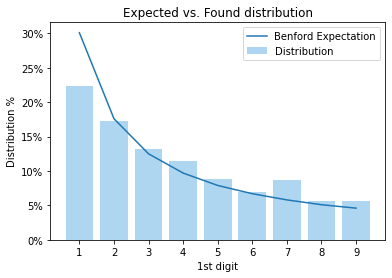

In [3]:
Premier_chiffre = []
for i in data['Total']:
    Premier_chiffre.append(str(i)[0])
Premier_chiffre.sort()

word_counts={}
for word in Premier_chiffre:
    previous_count = word_counts.get(word, 0)
    word_counts[word] = previous_count + 1
sommes= sum(word_counts.values())

listt=[]
for i in word_counts:
    x=(int(word_counts[i])/sommes)
    listt.append(x)

plt.plot(ben, label ='Benford Expectation')
plt.bar(word_counts.keys(), listt, color='#AED6F1', label ='Distribution')
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.xlabel("1st digit")
plt.ylabel("Distribution %")
plt.legend('Distribution - 1st digit') 
plt.title("Expected vs. Found distribution")
plt.legend() 
plt.show()



Benford's Law bilan

In [6]:
dt = pd.DataFrame.from_dict(word_counts, orient='index',columns=['Occurence'])
dt['Digit'] = word_counts.keys()
dt['Expected Value']=ben
dt['Actual Value'] = listt
dt['Difference'] = (dt['Expected Value']-dt['Actual Value'])
dt=dt.set_index('Digit')

dt

,Occurence,Expected Value,Actual Value,Difference
Digit,,,,
1,223,0.301,0.223,0.078
2,173,0.176,0.173,0.003
3,132,0.125,0.132,-0.007
4,115,0.097,0.115,-0.018
5,88,0.079,0.088,-0.009
6,69,0.067,0.069,-0.002
7,87,0.058,0.087,-0.029
8,57,0.051,0.057,-0.006
9,56,0.046,0.056,-0.010
